<a href="https://colab.research.google.com/github/koteswar-e/project/blob/main/10Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn import metrics
#                                 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

Load Dataset

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [40]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


Taking full fraction of data

In [42]:
data = data.sample(frac=1)
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
198,199,137,18
122,123,69,58
161,162,79,83
193,194,113,91
104,105,62,56



**K-Means**

In [70]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

Labels

In [44]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1], dtype=int32)

In [72]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

In [74]:
centers = k_means.cluster_centers_

centers

array([[150.5 ,  81.56,  50.47],
       [ 50.5 ,  39.56,  49.93]])

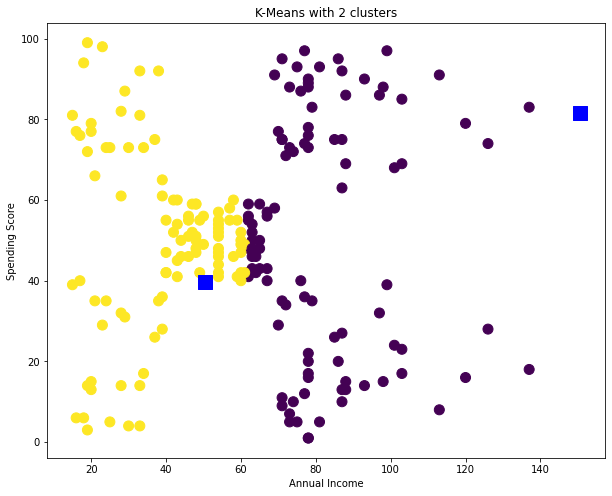

In [75]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [48]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.5075884551795813


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

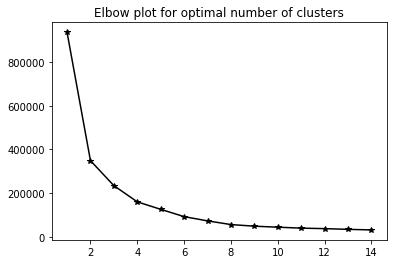

In [49]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

KMeans clustering with 5 clusters

In [76]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [77]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [81]:
centers = k_means.cluster_centers_

centers

array([[164.        ,  87.91666667,  17.88888889],
       [ 23.        ,  26.30434783,  20.91304348],
       [ 95.53333333,  58.86666667,  48.88333333],
       [ 38.5       ,  34.16666667,  66.16666667],
       [162.        ,  86.53846154,  82.12820513]])

Displaying Data in 5 cluster form

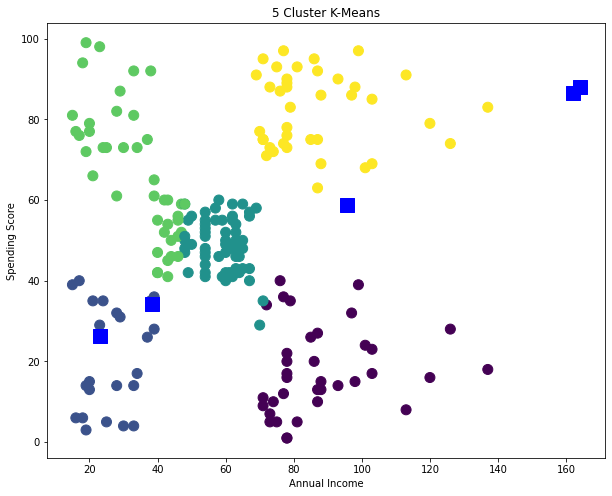

In [82]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

#Silhouette Score: This is a better measure to decide the number of clusters to be formulated from the data.

In [ ]:
#Silhouette Score: This is a better measure to decide the number of clusters to be formulated from the data.
score = metrics.silhouette_score(data, k_means.labels_)

print("Score = ", score)

#This function returns the Silhouette Coefficient for each sample.

#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.


Score =  0.4656389336257885


In [ ]:
score1 = metrics.silhouette_samples(data, k_means.labels_, metric='euclidean')
print("Score = ", score1)

Score =  [ 0.6316793   0.44696329  0.28693695  0.70205457  0.43323662  0.29994848
  0.35745271  0.325958    0.19458864  0.41133898  0.65551421  0.6958808
  0.72733974  0.03258305  0.35358993  0.22296031  0.71200971 -0.04592529
  0.64205652  0.61721724  0.549185    0.58810821  0.53106288  0.30291741
  0.26206337  0.55497971  0.58158264  0.53000725  0.29699038  0.53910648
  0.25872163  0.41148323  0.59117888  0.45087207  0.31087821  0.74270017
  0.62341122  0.55685288  0.71853148  0.61117844  0.5558083   0.53461568
  0.34865631  0.12038874  0.04889815  0.05722882  0.16526144  0.67749612
  0.36656723  0.64653397  0.47149775  0.2683595   0.50346205  0.35723144
  0.53862788 -0.01171565  0.38040332  0.59640129  0.61899608  0.53551672
  0.56446105  0.59886508  0.52220211  0.52065489  0.63117353  0.54910493
  0.19856332  0.44851549  0.73623335  0.61676284  0.50258335  0.30021025
  0.71660132  0.52895506  0.65682186  0.34680925  0.58665934  0.28992337
  0.51420777  0.66367826  0.69512641  0.619

Affinity Propagation

In [ ]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(data)
#
yhat_aff = model_aff.predict(data)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1 2 3 4 5 6 7 8]


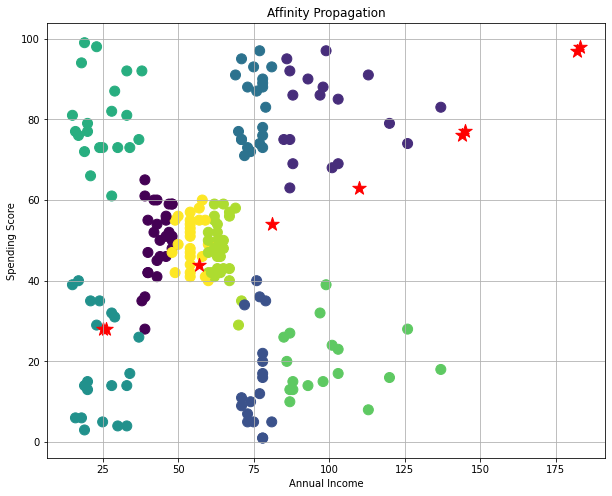

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [ ]:
score_aff = metrics.silhouette_score(data,labels_aff)

print("Score of Affinity Propagation = ", score_aff)

Score of Affinity Propagation =  0.4542059846314937


**DBSCAN**

In [30]:
# dbscan clustering
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values


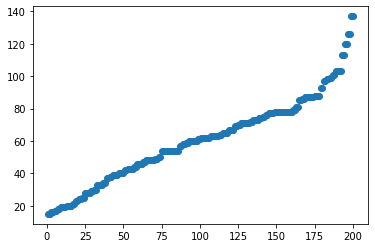

In [31]:
# define the model
model = DBSCAN(eps=0.7, min_samples=90)
# fit model and predict clusters
yhat = model.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

**Mean Shift**

In [32]:
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data)
#
yhat_ms = model_ms.predict(data)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

Clusters of Mean Shift. [0 1 2 3 4 5 6]


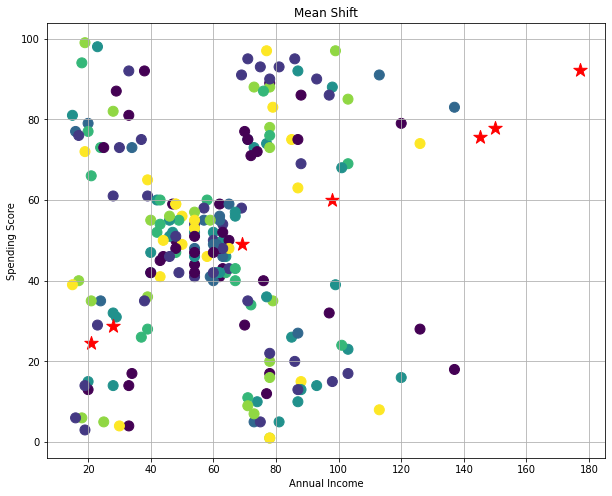

In [62]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_ms, s=100)

plt.scatter(centroids_ms[:,0], centroids_ms[:,1], color='red', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift')
plt.grid()
plt.show()

In [34]:
score_ms = metrics.silhouette_score(data,labels_ms)

print("Score of Mean Shift = ", score_ms)

Score of Mean Shift =  0.46575837492727784


**Gaussian Mixture Model**

In [35]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

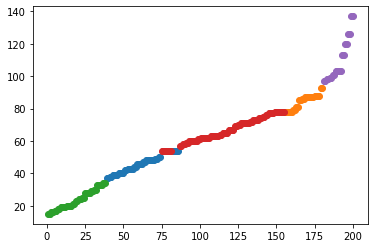

In [55]:
model_gb = GaussianMixture(n_components=5)
model_gb.fit(data_X)
#
yhat_gb = model_gb.predict(data_X)
clusters_gb = unique(yhat_gb)
# create scatter plot for samples from each cluster
for cluster in clusters_gb:
	# get row indexes for samples with this cluster
	row_ix = where(yhat_gb == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()